In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loading the dataset
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
def graphs(data):
    
        data.hist(figsize=(12, 10))
        plt.show()
        #box plot of 'age' 
        sns.boxplot(x='age', data=data)
        plt.show()

        #scatter plot of 'age' vs 'fare'
        sns.scatterplot(x='age', y='fare', data=data)
        plt.show()

       
    



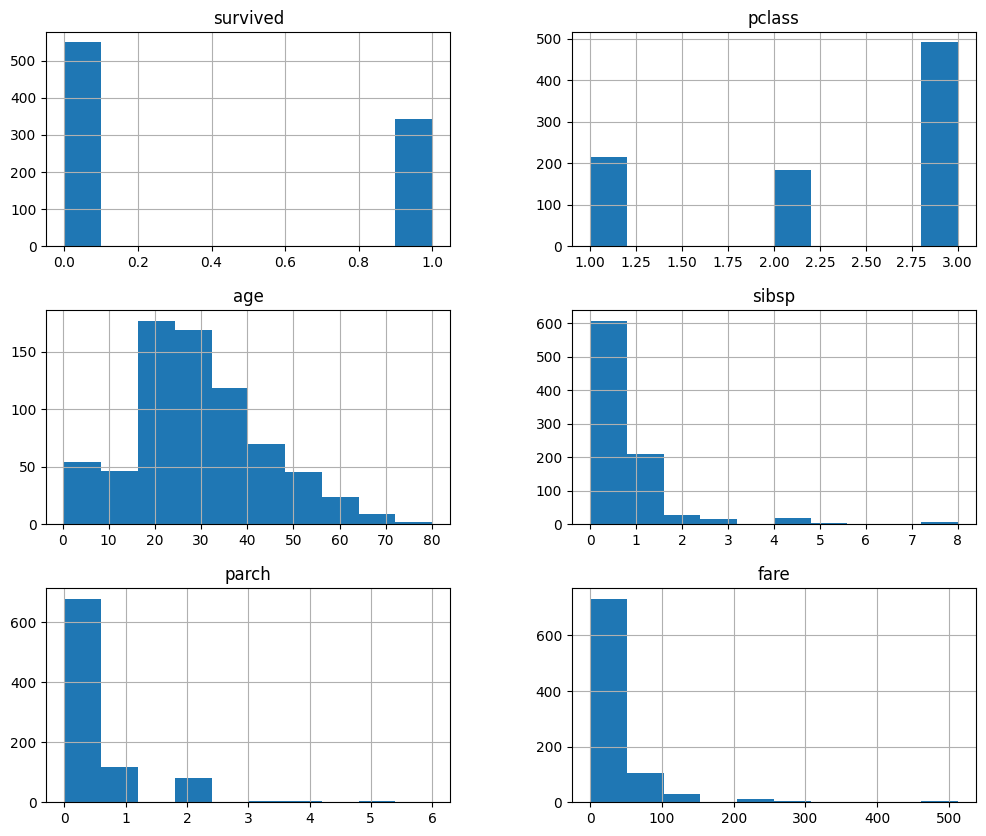

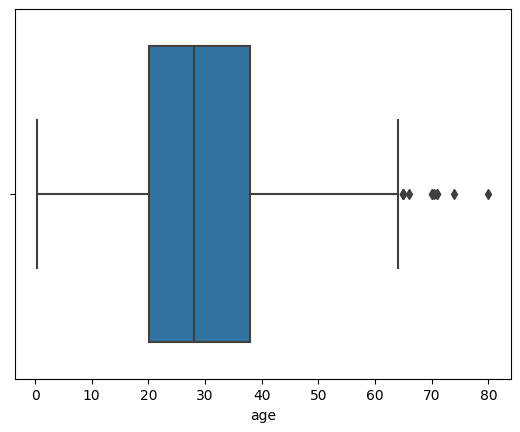

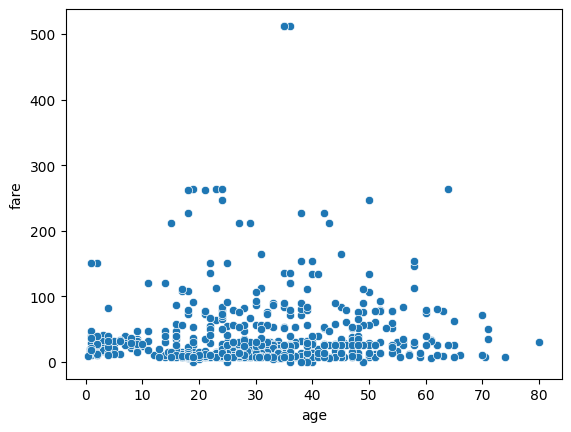

In [21]:
graphs(df)

In [29]:
#handling missing values
missing_values=df.isnull().sum()*100/len(df)
missing_values=pd.DataFrame({'Missing_perc': missing_values})
missing_values.columns=[ 'Missing_perc']
missing_values

,Missing_perc
survived,0.000000
pclass,0.000000
sex,0.000000
age,19.865320
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.224467
class,0.000000
who,0.000000


In [30]:
def missing(df):
    df['age'].fillna(df['age'].median(), inplace=True)#fill the missing values of age with median
    df.drop_duplicates(inplace=True)#removing duplicates
    df.loc[df['fare']<0, 'fare']=df['fare'].median() #correcting data entry errors
    df['sex']=df['sex'].astype('category') # converting data types to category
    # Addressing outliers: remove rows where 'fare' is greater than 3 standard deviations from the mean
    fare_mean=df['fare'].mean()
    fare_std=df['fare'].std()
    df=df[(df['fare']>= fare_mean - 3 * fare_std) & (df['fare']<= fare_mean + 3 * fare_std)]








In [31]:
missing(df)

In [32]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,0.413572,2.240717,29.622817,0.524968,0.417414,34.750464
std,0.492789,0.855409,13.764671,0.987592,0.838132,52.237906
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.020800
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
df.isnull().sum()*100/len(df)

survived        0.000000
pclass          0.000000
sex             0.000000
age             0.000000
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.256082
class           0.000000
who             0.000000
adult_male      0.000000
deck           74.135723
embark_town     0.256082
alive           0.000000
alone           0.000000
dtype: float64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 781 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     781 non-null    int64   
 1   pclass       781 non-null    int64   
 2   sex          781 non-null    category
 3   age          781 non-null    float64 
 4   sibsp        781 non-null    int64   
 5   parch        781 non-null    int64   
 6   fare         781 non-null    float64 
 7   embarked     779 non-null    object  
 8   class        781 non-null    category
 9   who          781 non-null    object  
 10  adult_male   781 non-null    bool    
 11  deck         202 non-null    category
 12  embark_town  779 non-null    object  
 13  alive        781 non-null    object  
 14  alone        781 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(4)
memory usage: 71.5+ KB
